In [1]:
!pip install grape

In [2]:
# old versions of Monarch stored in grape.datasets
!wget https://data.monarchinitiative.org/monarch-kg-dev/2022-05-10/monarch-kg.tar.gz
!tar -xvzf monarch-kg.tar.gz

--2022-09-19 09:49:33--  https://data.monarchinitiative.org/monarch-kg-dev/2022-05-10/monarch-kg.tar.gz
Resolving data.monarchinitiative.org (data.monarchinitiative.org)... 35.208.191.193
Connecting to data.monarchinitiative.org (data.monarchinitiative.org)|35.208.191.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138418295 (132M) [application/x-tar]
Saving to: ‘monarch-kg.tar.gz.2’

monarch-kg.tar.gz.2 100%[===================>] 132.01M  40.4MB/s    in 3.6s    

2022-09-19 09:49:38 (37.2 MB/s) - ‘monarch-kg.tar.gz.2’ saved [138418295/138418295]

x monarch-kg_nodes.tsv
x monarch-kg_edges.tsv


In [3]:
!pip install environments_utils -U

In [4]:
from grape.datasets.monarchinitiative import Monarch

In [5]:
# version of monarch used for rotation project -> 2022-05-10
g = Monarch(version="2022-05-10")

In [6]:
# first order line,
# tf one is slow
from grape.embedders import FirstOrderLINEEnsmallen

model = FirstOrderLINEEnsmallen()

In [7]:
%%time
embedding = model.fit_transform(g)

/Users/cortkath/PycharmProjects/EDS_Rotation/venv/lib/python3.8/site-packages/embiggen/utils/abstract_models/abstract_embedding_model.py:166: UserWarning: Please be advised that the Monarch graph contains 418477 disconnected nodes. Consider that node embedding algorithms that only use topological information such as CBOW, GloVe, SPINE and SkipGram are not able to provide meaningful embeddings for these nodes, and their embedding will be generally far away from any other node. It is also possible that all disconnected nodes will receive a relatively similar node embedding. Consider dropping them by using the `graph.remove_disconnected_nodes()` method.
  warnings.warn(


CPU times: user 18min 30s, sys: 6.53 s, total: 18min 37s
Wall time: 2min 32s


In [8]:
# faster than scipy tsne
!pip install MulticoreTSNE

  Using cached MulticoreTSNE-0.1.tar.gz (20 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [23 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.14.6-x86_64-cpython-38
      creating build/lib.macosx-10.14.6-x86_64-cpython-38/MulticoreTSNE
      copying MulticoreTSNE/__init__.py -> build/lib.macosx-10.14.6-x86_64-cpython-38/MulticoreTSNE
      creating build/lib.macosx-10.14.6-x86_64-cpython-38/MulticoreTSNE/tests
      copying MulticoreTSNE/tests/__init__.py -> build/lib.macosx-10.14.6-x86_64-cpython-38/MulticoreTSNE/tests
      copying MulticoreTSNE/tests/test_base.py -> build/lib.macosx-10.14.6-x86_64-cpython-38/MulticoreTSNE/tests
      running egg_info
      writing MulticoreTSNE.egg-info/PKG-INFO
      writing dependency_links to MulticoreTSNE.egg-info/dependency_links.tx

/Users/cortkath/PycharmProjects/EDS_Rotation/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:825: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 19993 samples in 0.002s...
[t-SNE] Computed neighbors for 19993 samples in 9.947s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19993
[t-SNE] Computed conditional probabilities for sample 2000 / 19993
[t-SNE] Computed conditional probabilities for sample 3000 / 19993
[t-SNE] Computed conditional probabilities for sample 4000 / 19993
[t-SNE] Computed conditional probabilities for sample 5000 / 19993
[t-SNE] Computed conditional probabilities for sample 6000 / 19993
[t-SNE] Computed conditional probabilities for sample 7000 / 19993
[t-SNE] Computed conditional probabilities for sample 8000 / 19993
[t-SNE] Computed conditional probabilities for sample 9000 / 19993
[t-SNE] Computed conditional probabilities for sample 10000 / 19993
[t-SNE] Computed conditional probabilities for sample 11000 / 19993
[t-SNE] Computed conditional probabilities for sample 12000 / 19993
[t-SNE] Computed conditional probabilities for sam

/Users/cortkath/PycharmProjects/EDS_Rotation/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:825: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(


[t-SNE] Computed neighbors for 20000 samples in 9.632s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sample 13000 / 20000
[t-SNE] Computed conditional probabilities for sample 14000 / 20000

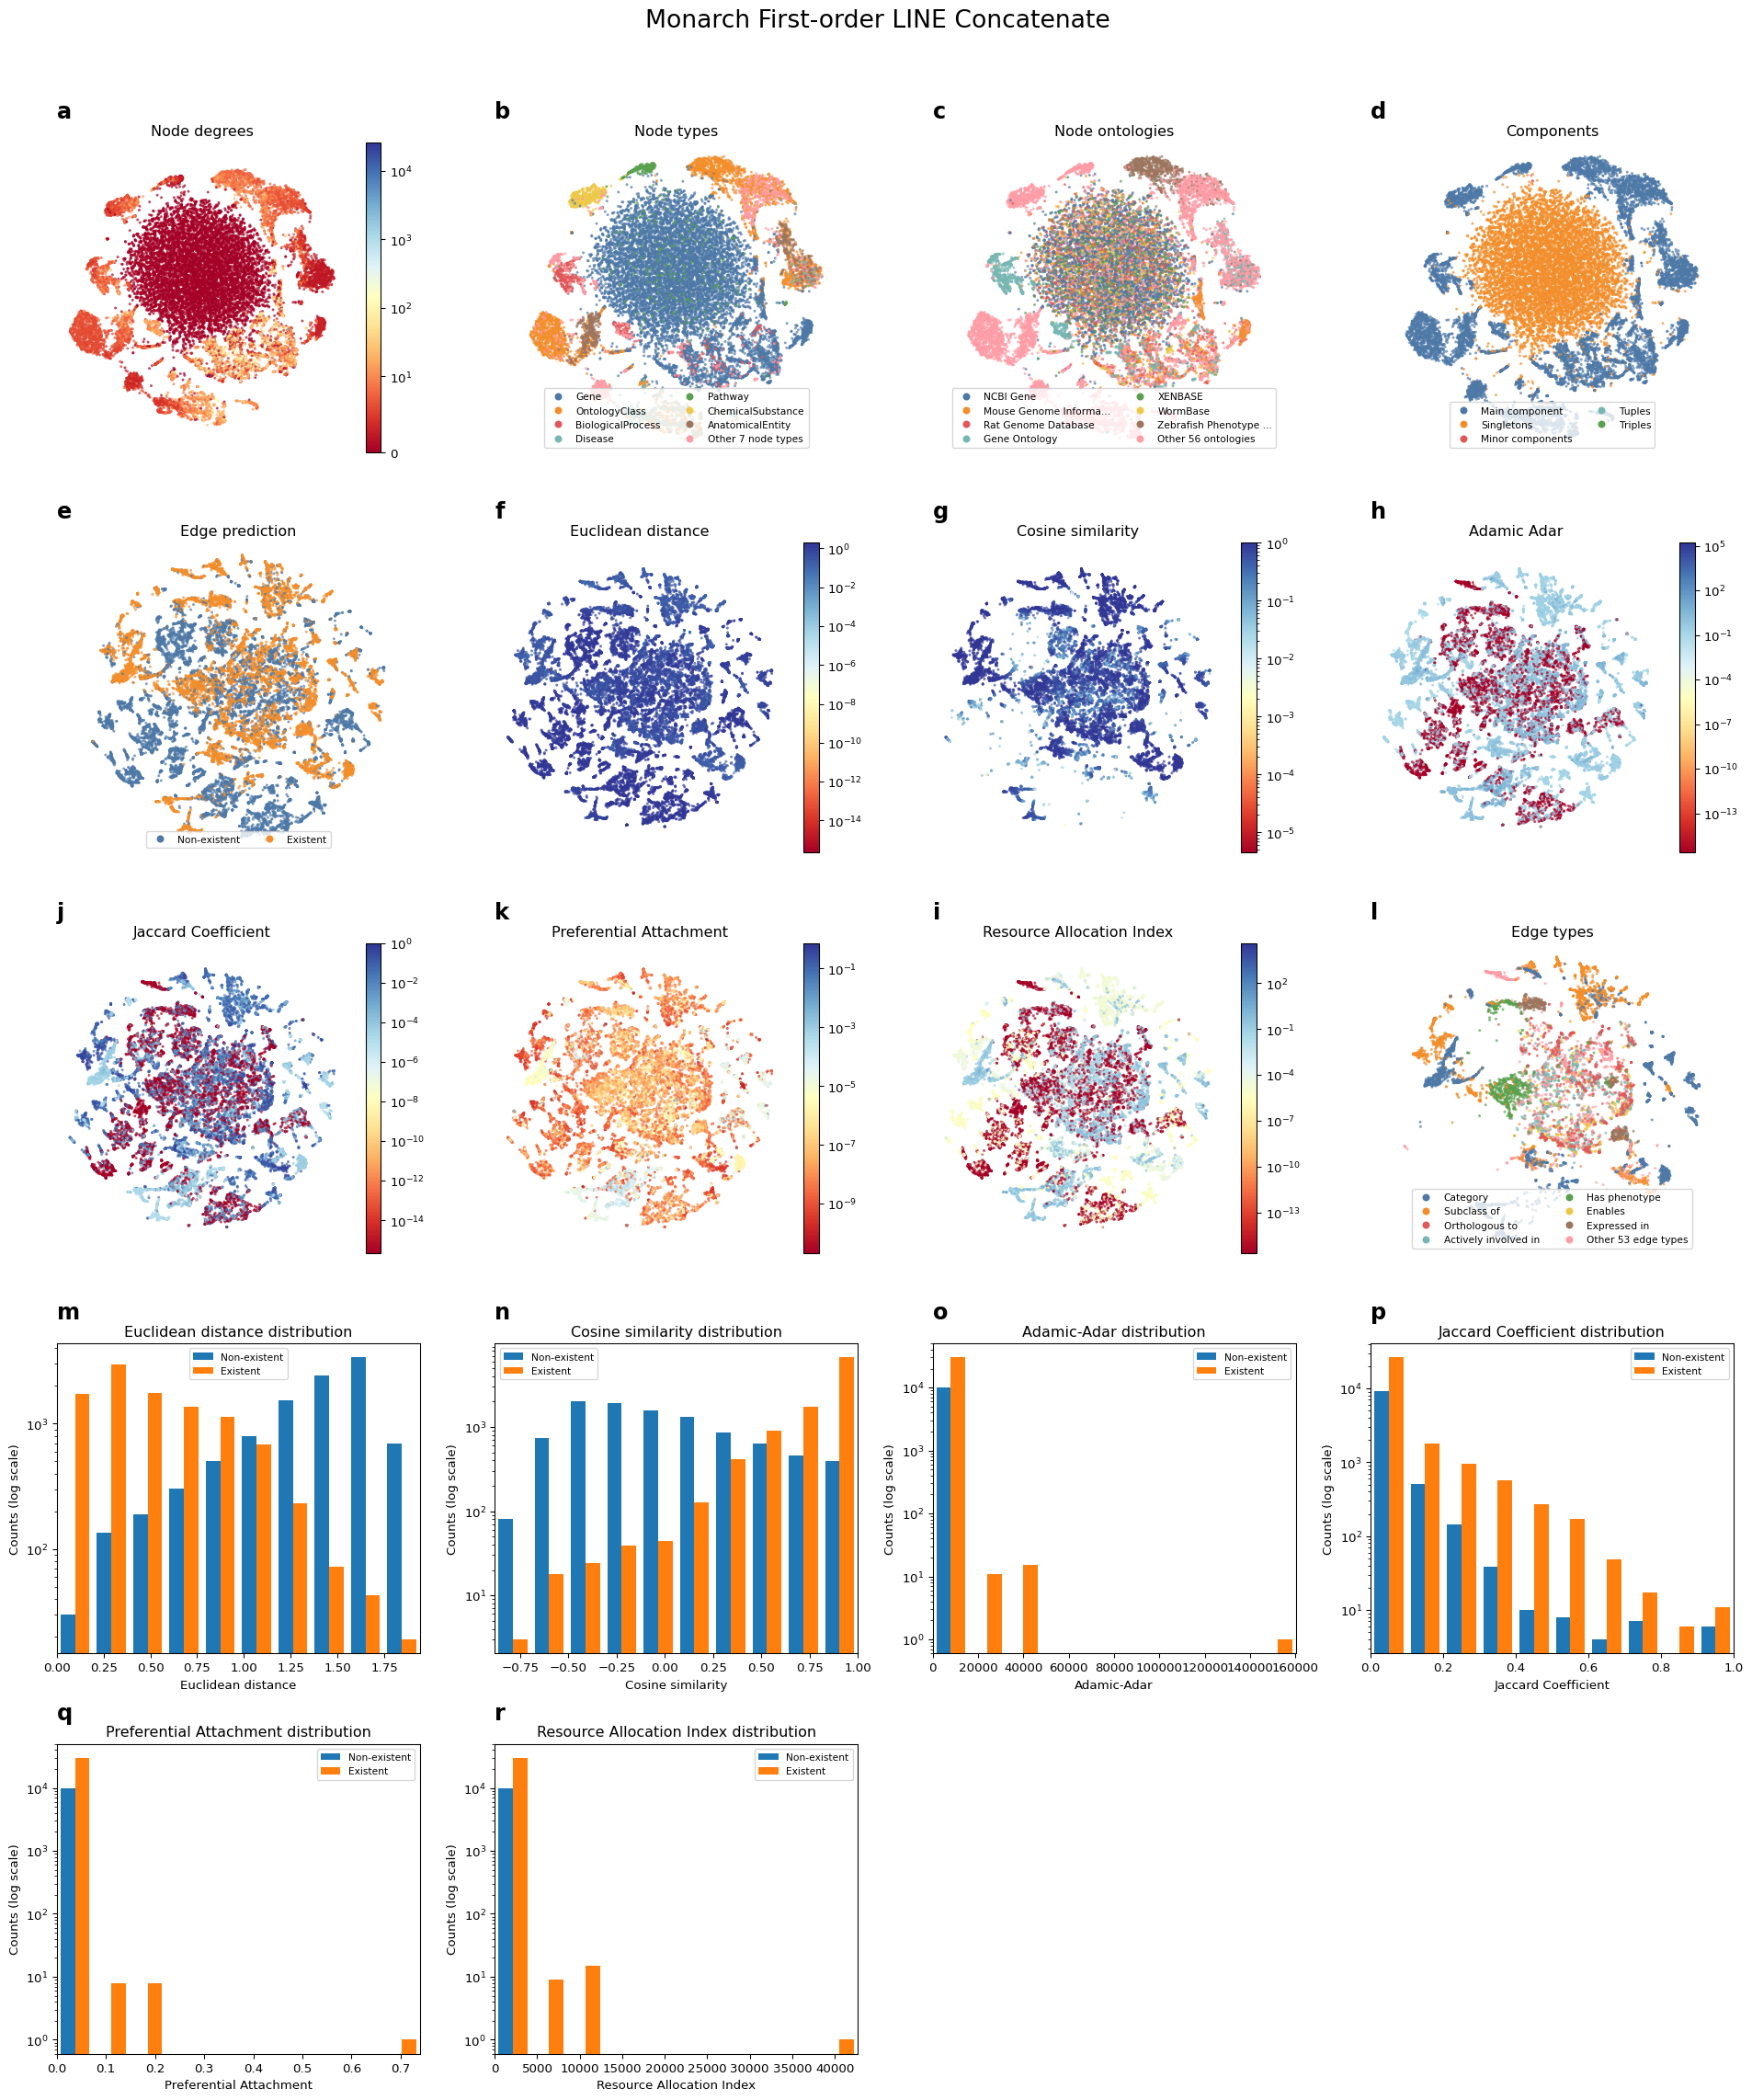

In [9]:
# visualize information about graph

from grape import GraphVisualizer

GraphVisualizer(g, verbose=True).fit_and_plot_all(embedding)

In [10]:
# may want to drop single nodes
# use graph.remove_disconnected_nodes() method to remove singleton nodes

# run perceptron trained on cosine sim
# adjust noise ->makes smoother
# didnt work well -> not large range of cosine sim values

from grape.edge_prediction import PerceptronEdgePrediction

modelP = PerceptronEdgePrediction(edge_embeddings='CosineSimilarity', edge_features=None)

In [11]:
modelP.fit(graph=g, node_features=embedding)

In [12]:
# only get human gene nodes
nodeNames = g.get_node_names_from_node_curie_prefixes(['HGNC'])
nodeNames

['HGNC:100',
 'HGNC:10000',
 'HGNC:10001',
 'HGNC:10002',
 'HGNC:10003',
 'HGNC:10004',
 'HGNC:10006',
 'HGNC:10007',
 'HGNC:10008',
 'HGNC:10009',
 'HGNC:1001',
 'HGNC:10010',
 'HGNC:10011',
 'HGNC:10012',
 'HGNC:10013',
 'HGNC:10017',
 'HGNC:10018',
 'HGNC:10019',
 'HGNC:1002',
 'HGNC:10020',
 'HGNC:10021',
 'HGNC:10023',
 'HGNC:10024',
 'HGNC:10025',
 'HGNC:10027',
 'HGNC:10031',
 'HGNC:10037',
 'HGNC:10038',
 'HGNC:10039',
 'HGNC:1004',
 'HGNC:10040',
 'HGNC:10041',
 'HGNC:10042',
 'HGNC:10043',
 'HGNC:10044',
 'HGNC:10045',
 'HGNC:10046',
 'HGNC:10047',
 'HGNC:10048',
 'HGNC:10049',
 'HGNC:1005',
 'HGNC:10050',
 'HGNC:10056',
 'HGNC:10058',
 'HGNC:1006',
 'HGNC:10060',
 'HGNC:10061',
 'HGNC:10062',
 'HGNC:10064',
 'HGNC:10065',
 'HGNC:10067',
 'HGNC:10068',
 'HGNC:10069',
 'HGNC:1007',
 'HGNC:10070',
 'HGNC:10071',
 'HGNC:10072',
 'HGNC:10073',
 'HGNC:10075',
 'HGNC:10078',
 'HGNC:10079',
 'HGNC:1008',
 'HGNC:10080',
 'HGNC:10082',
 'HGNC:10083',
 'HGNC:10084',
 'HGNC:10085',
 'HG

In [13]:
# get cosine sim values for human genes to EDS hypermobile type
df = modelP.predict_proba_bipartite_graph_from_edge_node_names(g, source_node_names=['MONDO:0007523'], 
                                                               destination_node_names=nodeNames, 
                                                               node_features=embedding, 
                                                               return_predictions_dataframe=True)

In [14]:
# gives node ids and can convert to node names
df

,predictions,sources,destinations
0,0.015304,313773,185215
1,0.012364,313773,185216
2,0.017068,313773,185217
3,0.008247,313773,185218
4,0.006222,313773,185219
...,...,...,...
22529,0.009573,313773,207744
22530,0.011466,313773,207745
22531,0.012629,313773,207746
22532,0.007689,313773,207747


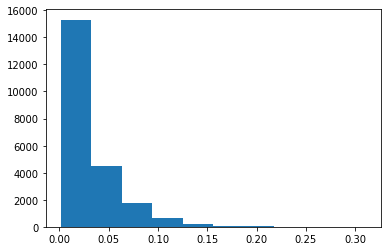

In [15]:
import matplotlib.pyplot as plt
# get spread of cosine sim values
# want: spread of values
# not great
plt.hist(df.predictions)
plt.show()

In [16]:
from grape.embedding_transformers import EdgeTransformer

et = EdgeTransformer(method='CosineSimilarity', aligned_mapping=True)
et.fit(embedding.get_node_embedding_from_index(0).to_numpy())


In [17]:
cosSims = et.transform(sources=df.sources.to_numpy(), destinations=df.destinations.to_numpy())

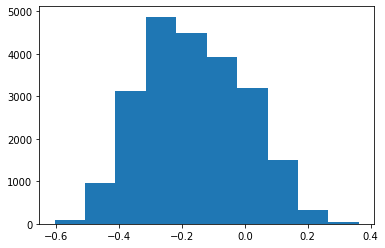

In [18]:
plt.hist(cosSims)
plt.show()

In [19]:
from grape.datasets import get_graph_okapi_tfidf_weighted_textual_embedding

In [20]:
!pip install torch

In [21]:
embedding = get_graph_okapi_tfidf_weighted_textual_embedding(name='Monarch', version='2022-05-10', 
                                                             repository='monarchinitiative', 
                                                             pretrained_model_name_or_path='allenai/scibert_scivocab_uncased')

/Users/cortkath/PycharmProjects/EDS_Rotation/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:825: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 19993 samples in 0.003s...
[t-SNE] Computed neighbors for 19993 samples in 10.945s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19993
[t-SNE] Computed conditional probabilities for sample 2000 / 19993
[t-SNE] Computed conditional probabilities for sample 3000 / 19993
[t-SNE] Computed conditional probabilities for sample 4000 / 19993
[t-SNE] Computed conditional probabilities for sample 5000 / 19993
[t-SNE] Computed conditional probabilities for sample 6000 / 19993
[t-SNE] Computed conditional probabilities for sample 7000 / 19993
[t-SNE] Computed conditional probabilities for sample 8000 / 19993
[t-SNE] Computed conditional probabilities for sample 9000 / 19993
[t-SNE] Computed conditional probabilities for sample 10000 / 19993
[t-SNE] Computed conditional probabilities for sample 11000 / 19993
[t-SNE] Computed conditional probabilities for sample 12000 / 19993
[t-SNE] Computed conditional probabilities for sa

/Users/cortkath/PycharmProjects/EDS_Rotation/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:825: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.002s...
[t-SNE] Computed neighbors for 20000 samples in 11.636s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

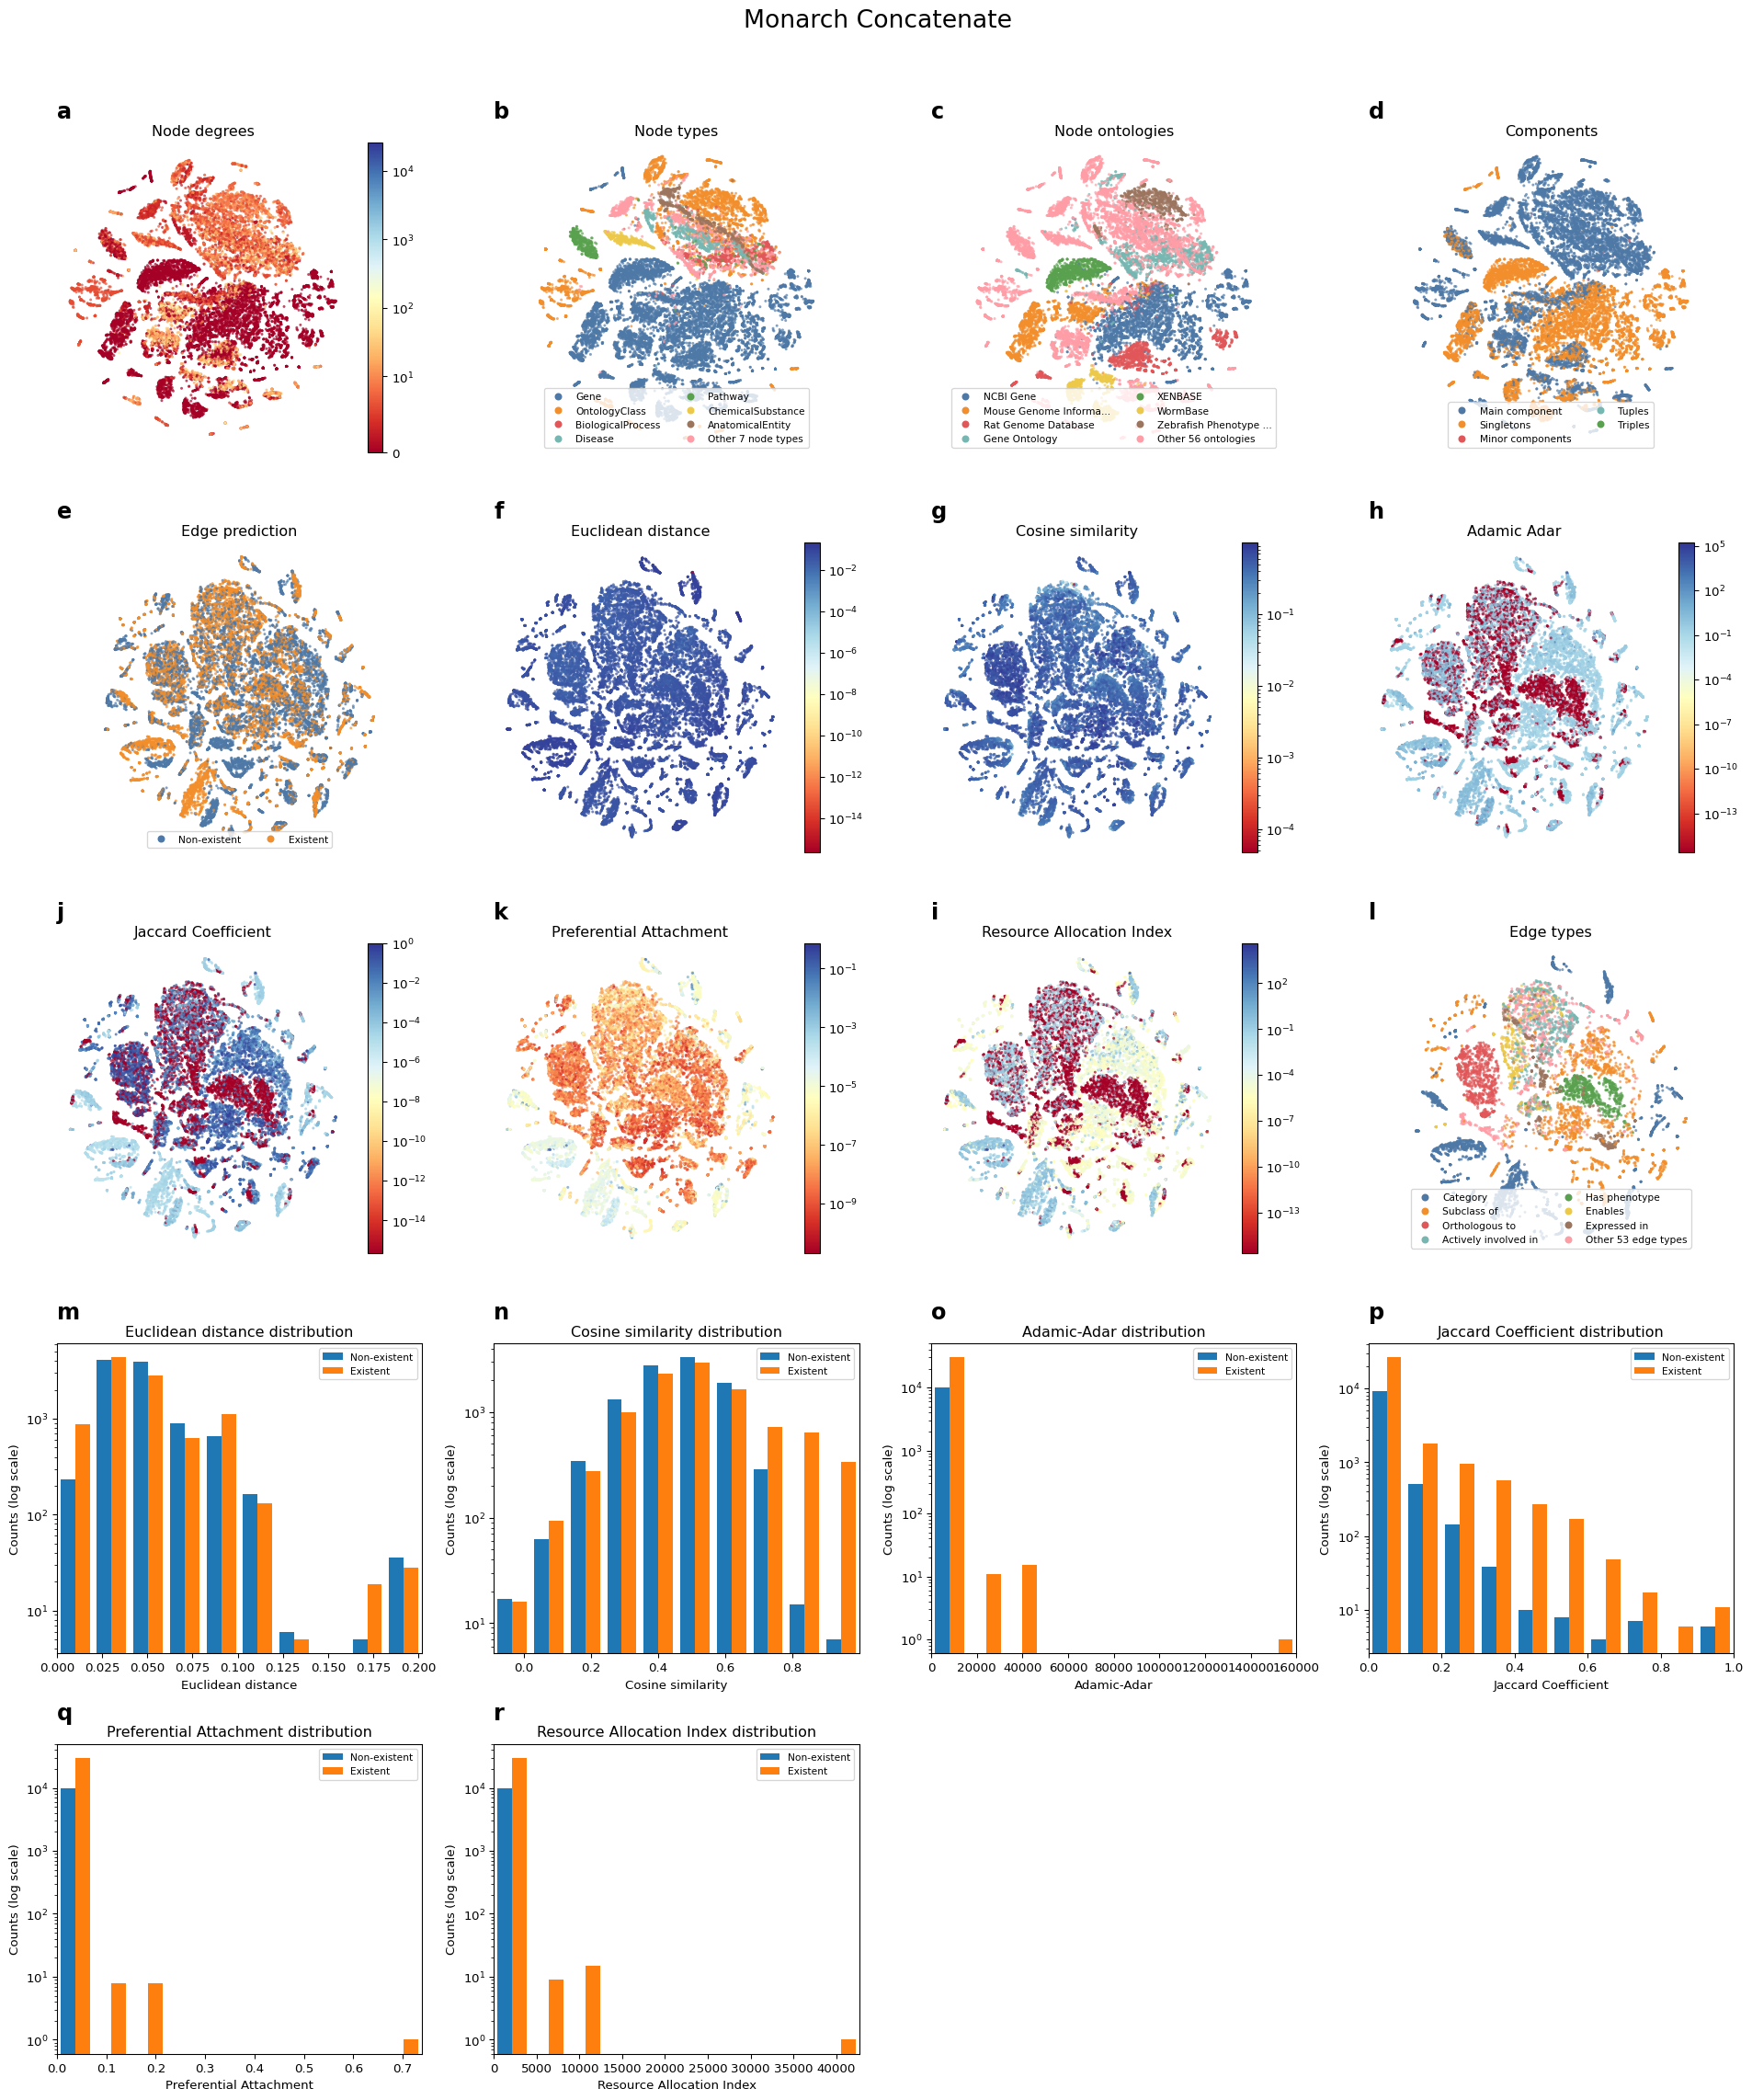

In [22]:
from grape import GraphVisualizer
import numpy as np
#running perceptron as before but on cybert
GraphVisualizer(g, verbose=True).fit_and_plot_all(embedding.astype(np.float32))


In [23]:
from grape.edge_prediction import PerceptronEdgePrediction

modelP = PerceptronEdgePrediction(edge_features='Degree').into_smoke_test()
modelP.fit(graph=g)
nodeNames = g.get_node_names_from_node_curie_prefixes(['HGNC'])
df = modelP.predict_proba_bipartite_graph_from_edge_node_names(g, source_node_names=['MONDO:0007523'], 
                                                               destination_node_names=nodeNames, return_predictions_dataframe=True)

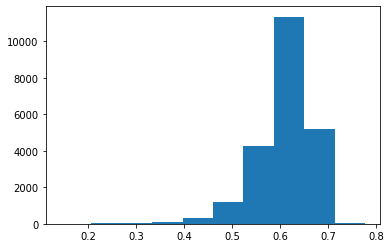

In [24]:
from grape.embedding_transformers import EdgeTransformer
import numpy as np
import matplotlib.pyplot as plt

et = EdgeTransformer(method='CosineSimilarity', aligned_mapping=True)
et.fit(embedding.astype(np.float32))
cosSims = et.transform(sources=df.sources.to_numpy(), destinations=df.destinations.to_numpy())
plt.hist(cosSims)
plt.show()

In [25]:
df['CosineSimilarity'] = cosSims
df['DestinationNodeNames'] = [
    g.get_node_name_from_node_id(nodeID) for nodeID in df.destinations
]
df.sort_values('CosineSimilarity')
df

,predictions,sources,destinations,CosineSimilarity,DestinationNodeNames
0,0.505078,313773,185215,0.555352,HGNC:100
1,0.505078,313773,185216,0.586147,HGNC:10000
2,0.505078,313773,185217,0.498461,HGNC:10001
3,0.505078,313773,185218,0.501914,HGNC:10002
4,0.505078,313773,185219,0.512333,HGNC:10003
...,...,...,...,...,...
22529,0.505078,313773,207744,0.525769,HGNC:9994
22530,0.505078,313773,207745,0.525504,HGNC:9995
22531,0.505078,313773,207746,0.479773,HGNC:9997
22532,0.505078,313773,207747,0.492432,HGNC:9998


In [26]:
topGenes = df.sort_values('CosineSimilarity').tail(20)['DestinationNodeNames'].tolist()
topGenes

['HGNC:17111',
 'HGNC:1366',
 'HGNC:11133',
 'HGNC:1160',
 'HGNC:17109',
 'HGNC:7223',
 'HGNC:219',
 'HGNC:13202',
 'HGNC:2860',
 'HGNC:7224',
 'HGNC:445',
 'HGNC:9081',
 'HGNC:15492',
 'HGNC:17870',
 'HGNC:9364',
 'HGNC:2037',
 'HGNC:2073',
 'HGNC:360',
 'HGNC:9023',
 'HGNC:2201']

In [27]:
# get gene names
import pandas as pd
def getGeneMappings():
  mappingsF = 'http://ftp.ebi.ac.uk/pub/databases/genenames/hgnc/archive/quarterly/tsv/hgnc_complete_set_2022-04-01.txt'
  mappingDB = pd.read_csv(mappingsF, sep='\t')
  return mappingDB[['hgnc_id', 'symbol']]

geneMappings = getGeneMappings()
geneMappingsDict = dict(zip(geneMappings['hgnc_id'], geneMappings['symbol']))
for t in topGenes:
    print(geneMappingsDict[t])

ADAMTS19
ADAMTS13
SNAP29
TWNK
ADAMTS17
MPST
ADAMTS3
ADAMTS9
DHCR7
MPV17
SETX
PLOD1
ANKH
INVS
PRG4
CLDN16
TPP1
AIRE
PKP1
COL3A1


/var/folders/8d/chf_w62s71n_gmwr13bkzw2r0000gp/T/ipykernel_39147/3218681268.py:5: DtypeWarning: Columns (32,34,38,40,50) have mixed types. Specify dtype option on import or set low_memory=False.
  mappingDB = pd.read_csv(mappingsF, sep='\t')


In [28]:
for gene in topGenes:
    # g.get_k_shortest_path_node_names_from_node_names
    # g.get_neighbour_node_names_from_node_name
    
    p = g.get_shortest_path_node_names_from_node_names(
        src_node_name=gene,
        dst_node_name="MONDO:0007523",
        )
    print(p)

['HGNC:17111', 'FB:FBgn0029791', 'FBbt:00005037', 'biolink:NamedThing', 'MONDO:0007523']
['HGNC:1366', 'FB:FBgn0029791', 'FBbt:00005037', 'biolink:NamedThing', 'MONDO:0007523']
['HGNC:11133', 'FB:FBgn0034913', 'FBbt:00000001', 'biolink:NamedThing', 'MONDO:0007523']
['HGNC:1160', 'FB:FBgn0032154', 'GO:0000002', 'biolink:NamedThing', 'MONDO:0007523']
['HGNC:17109', 'FB:FBgn0029791', 'FBbt:00005037', 'biolink:NamedThing', 'MONDO:0007523']
['HGNC:7223', 'MGI:2179733', 'GO:0001822', 'biolink:NamedThing', 'MONDO:0007523']
['HGNC:219', 'FB:FBgn0051619', 'FBbt:00000465', 'biolink:NamedThing', 'MONDO:0007523']
['HGNC:13202', 'FB:FBgn0286071', 'FBbt:00000296', 'biolink:NamedThing', 'MONDO:0007523']
['HGNC:2860', 'MGI:1298378', 'GO:0001568', 'biolink:NamedThing', 'MONDO:0007523']
['HGNC:7224', 'FB:FBgn0039930', 'FBbt:00000001', 'biolink:NamedThing', 'MONDO:0007523']
['HGNC:445', 'FB:FBgn0035842', 'GO:0001147', 'biolink:NamedThing', 'MONDO:0007523']
['HGNC:9081', 'FB:FBgn0036147', 'FBbt:00001684',

In [29]:
p = g.get_k_shortest_path_node_names_from_node_names(
    k=10,
    src_node_name='HGNC:2201',
    dst_node_name="MONDO:0007523")
p

[['HGNC:2201',
  'MGI:88453',
  'GO:0001568',
  'biolink:NamedThing',
  'MONDO:0007523'],
 ['HGNC:2201',
  'MGI:88453',
  'GO:0001568',
  'biolink:OntologyClass',
  'MONDO:0007523'],
 ['HGNC:2201',
  'MGI:88453',
  'GO:0001701',
  'biolink:NamedThing',
  'MONDO:0007523'],
 ['HGNC:2201',
  'MGI:88453',
  'GO:0001701',
  'biolink:OntologyClass',
  'MONDO:0007523'],
 ['HGNC:2201',
  'MGI:88453',
  'GO:0001764',
  'biolink:NamedThing',
  'MONDO:0007523'],
 ['HGNC:2201',
  'MGI:88453',
  'GO:0001764',
  'biolink:OntologyClass',
  'MONDO:0007523'],
 ['HGNC:2201',
  'MGI:88453',
  'GO:0001894',
  'biolink:NamedThing',
  'MONDO:0007523'],
 ['HGNC:2201',
  'MGI:88453',
  'GO:0001894',
  'biolink:OntologyClass',
  'MONDO:0007523'],
 ['HGNC:2201',
  'MGI:88453',
  'GO:0002020',
  'biolink:NamedThing',
  'MONDO:0007523'],
 ['HGNC:2201',
  'MGI:88453',
  'GO:0002020',
  'biolink:OntologyClass',
  'MONDO:0007523']]

In [30]:
p = g.get_neighbour_node_names_from_node_name(
    node_name='HGNC:9023')
p

['FB:FBgn0260799',
 'MGI:1328359',
 'RGD:1307472',
 'WB:WBGene00002175',
 'ZFIN:ZDB-GENE-030131-417']

In [31]:
# TODO
# 1. Get phenotypes related to genes (HGNC, MGI, WB, FB, RGD, ZFIN)
# 2. Make visualizations of related phenotypes

In [32]:
print(df.loc[df['DestinationNodeNames'] == 'HGNC:6664'])
print(df.loc[df['DestinationNodeNames'] == 'HGNC:869'])
print(df.loc[df['DestinationNodeNames'] == 'HGNC:2037'])


       predictions  sources  destinations  CosineSimilarity  \
20195     0.505078   313773        205410          0.648144   

      DestinationNodeNames  
20195            HGNC:6664  
       predictions  sources  destinations  CosineSimilarity  \
21496     0.505078   313773        206711          0.610054   

      DestinationNodeNames  
21496             HGNC:869  
      predictions  sources  destinations  CosineSimilarity  \
6818     0.505078   313773        192033          0.744822   

     DestinationNodeNames  
6818            HGNC:2037  
